# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Import Library and Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Data

In [6]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
loan_status_map = {'Fully Paid': 0, 'Charged Off': 1}
df['loan_unrepaid'] = df['loan_status'].map(loan_status_map)

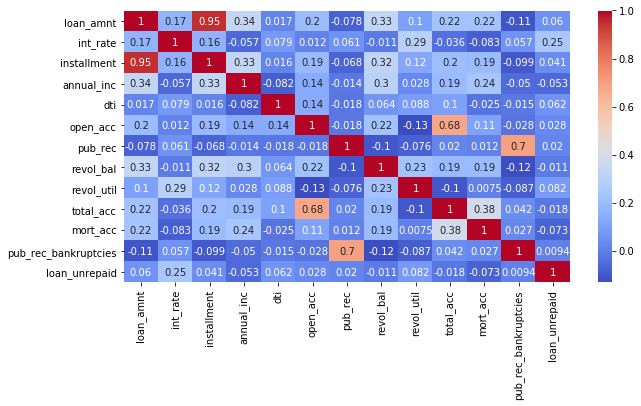

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## EDA: Exploratory Data Analysis

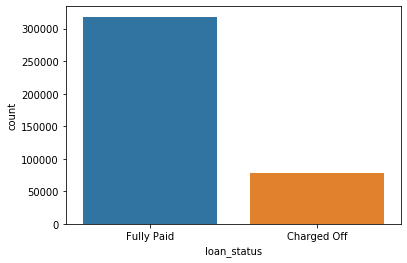

In [12]:
sns.countplot(x='loan_status', data=df)

# Use undersampling or oversampling to overcome unbalance data

([<matplotlib.axis.XTick at 0x24031d3ad48>,
 <a list of 2 Text xticklabel objects>)

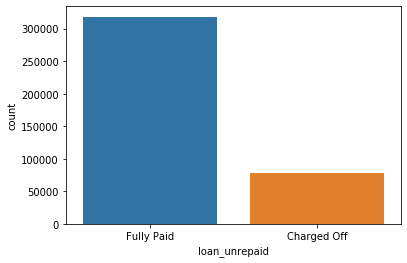

In [13]:
sns.countplot(x='loan_unrepaid', data=df)
plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])  # Set text labels.

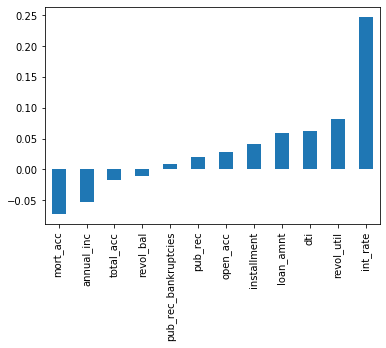

In [14]:
df.corr()['loan_unrepaid'][:-1].sort_values().plot(kind='bar')

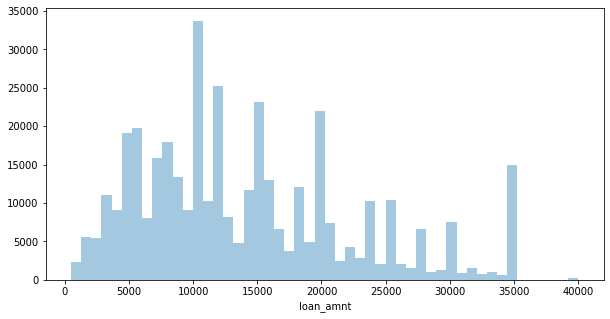

In [15]:
fig, axes = plt.subplots(figsize=(10,5))
sns.distplot(df['loan_amnt'], kde=False, ax=axes)

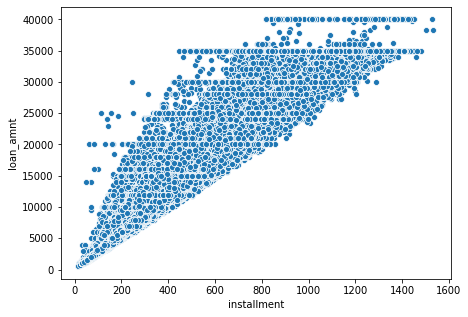

In [16]:
fig, axes = plt.subplots(figsize=(7, 5))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

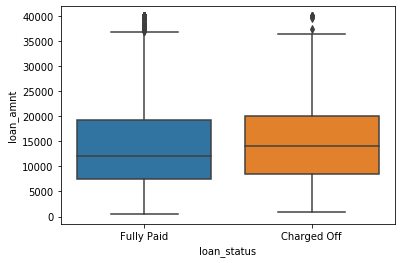

In [17]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [18]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
feat_info('emp_title')
feat_info('emp_length')
feat_info('title')
feat_info('revol_util')
feat_info('mort_acc')
feat_info('pub_rec_bankruptcies')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
The loan title provided by the borrower
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Number of mortgage accounts.
Number of public record bankruptcies


## Preprocessing

### Guide: 1. Remove or Fill missing data
### Guide: 2. Change categorical data to numerical data

In [20]:
df = df.dropna(subset=['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335868 entries, 0 to 396028
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335868 non-null  float64
 1   term                  335868 non-null  object 
 2   int_rate              335868 non-null  float64
 3   installment           335868 non-null  float64
 4   grade                 335868 non-null  object 
 5   sub_grade             335868 non-null  object 
 6   emp_title             335868 non-null  object 
 7   emp_length            335868 non-null  object 
 8   home_ownership        335868 non-null  object 
 9   annual_inc            335868 non-null  float64
 10  verification_status   335868 non-null  object 
 11  issue_d               335868 non-null  object 
 12  loan_status           335868 non-null  object 
 13  purpose               335868 non-null  object 
 14  title                 335868 non-null  object 
 15  

In [21]:
df.select_dtypes(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,36 months,B,B4,Michael's Arts & Crafts,5 years,RENT,Not Verified,Mar-2013,Fully Paid,debt_consolidation,Credit buster,Nov-1991,w,INDIVIDUAL,"514 Cynthia Park Apt. 402\nWest Williamside, S..."
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"


### Categorical to Numerical : term column

In [22]:
term_map = {'36 months':36, '60 months':60}
df.replace(to_replace=r"^\s+", value='', regex=True, inplace=True)
df['term'] = df['term'].map(term_map)

### Categorical to Numerical : grade and subgrade column

In [26]:
df.drop('grade', axis=1, inplace=True)

In [52]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'])
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df, subgrade_dummies], axis=1)

In [60]:
df.drop('sub_grade', axis=1, inplace=True)

### Categorical to Numerical : emp_title column

In [53]:
df['emp_title'].value_counts()

Teacher                              4368
Manager                              4234
RN                                   1841
Registered Nurse                     1841
Supervisor                           1813
                                     ... 
CITY OF CHICAGO                         1
FADS                                    1
Executive Office of the President       1
courier drivrr                          1
Walmart Stores                          1
Name: emp_title, Length: 150661, dtype: int64

In [55]:
df.drop('emp_title', inplace=True, axis=1)

### Categorical to Numerical : emp_length column

In [63]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [56]:
df['emp_length'].value_counts()

10+ years    115200
2 years       31393
3 years       27448
< 1 year      27366
5 years       22974
1 year        22613
4 years       20320
7 years       18768
6 years       18388
8 years       17500
9 years       13898
Name: emp_length, dtype: int64

In [65]:
emp_length_dummies = pd.get_dummies(df['emp_length'])
df = pd.concat([df, emp_length_dummies], axis=1)

In [67]:
df.drop('emp_length', axis=1, inplace=True)

### Categorical to Numerical : home_ownership column

In [68]:
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [69]:
df['home_ownership'].value_counts()

MORTGAGE    170832
RENT        133932
OWN          31045
OTHER           30
NONE            28
ANY              1
Name: home_ownership, dtype: int64

In [72]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'])
df = pd.concat([df, home_ownership_dummies], axis=1)

In [74]:
df.drop('home_ownership', axis=1, inplace=True)

### Categorical to Numerical : verification_status column

In [75]:
feat_info('verification_status')

Indicates if income was verified by LC, not verified, or if the income source was verified


In [78]:
df['verification_status'].value_counts()

Source Verified    115687
Verified           112521
Not Verified       107660
Name: verification_status, dtype: int64

In [79]:
verification_status_dummies = pd.get_dummies(df['verification_status'])
df = pd.concat([df, verification_status_dummies], axis=1)

In [82]:
df.drop('verification_status', axis=1, inplace=True)

### Categorical to Numerical : issue_d column

In [83]:
feat_info('issue_d')

The month which the loan was funded


In [85]:
len(df['issue_d'].value_counts())

58

In [86]:
df.drop('issue_d', axis=1, inplace=True)

### Categorical to Numerical : purpose and title column

In [88]:
feat_info('purpose')
feat_info('title')

A category provided by the borrower for the loan request. 
The loan title provided by the borrower


In [96]:
frame = {'purpose':df['purpose'], 'title':df['title']}
pd.DataFrame(frame)

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
...,...,...
396024,debt_consolidation,Credit buster
396025,debt_consolidation,Debt consolidation
396026,debt_consolidation,Debt consolidation
396027,debt_consolidation,pay off credit cards


In [98]:
purpose_dummies = pd.get_dummies(df['purpose'])
df = pd.concat([df, purpose_dummies], axis=1)

In [99]:
df.drop('title', axis=1, inplace=True)
df.drop('purpose', axis=1, inplace=True)

### Categorical to Numerical : earliest_cr_line column

In [100]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [102]:
len(df['earliest_cr_line'].value_counts())

661

In [103]:
df.drop('earliest_cr_line', axis=1, inplace=True)

### Categorical to Numerical : initial_list_status column

In [104]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [105]:
initial_list_status_dummies = pd.get_dummies(df['initial_list_status'])
df = pd.concat([df, initial_list_status_dummies], axis=1)

In [106]:
df.drop('initial_list_status', axis=1, inplace=True)

### Categorical to Numerical : application_type column

In [107]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [108]:
df['application_type'].value_counts()

INDIVIDUAL    335312
JOINT            311
DIRECT_PAY       245
Name: application_type, dtype: int64

In [109]:
application_type_dummies = pd.get_dummies(df['application_type'])
df = pd.concat([df, application_type_dummies], axis=1)

In [110]:
df.drop('application_type', axis=1, inplace=True)

### Categorical to Numerical : address column

In [116]:
df.drop('address', axis=1, inplace=True)

## Train Test Split

In [16]:
X = new_df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 
            'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']].values
y = new_df['loan_unrepaid'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling Data

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating Model 

In [21]:
model = Sequential()

model.add(Dense(27, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(27, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [41]:
model.fit(x=X_train, y=y_train, 
          epochs=500, verbose=1, callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 235107 samples, validate on 100761 samples
Epoch 1/500
235107/235107 [==============================] - 19s 82us/sample - loss: 0.4722 - val_loss: 0.4585
Epoch 2/500
235107/235107 [==============================] - 21s 90us/sample - loss: 0.4634 - val_loss: 0.4578
Epoch 3/500
235107/235107 [==============================] - 16s 70us/sample - loss: 0.4619 - val_loss: 0.4565
Epoch 4/500
235107/235107 [==============================] - 16s 67us/sample - loss: 0.4611 - val_loss: 0.4569
Epoch 5/500
235107/235107 [==============================] - 16s 68us/sample - loss: 0.4604 - val_loss: 0.4567
Epoch 6/500
235107/235107 [==============================] - 15s 65us/sample - loss: 0.4607 - val_loss: 0.4570
Epoch 7/500
235107/235107 [==============================] - 15s 65us/sample - loss: 0.4604 - val_loss: 0.4569
Epoch 8/500
235107/235107 [==============================] - 15s 65us/sample - loss: 0.4603 - val_loss: 0.4573
Epoch 00008: early stopping


In [27]:
model.save('plain_model.h5')

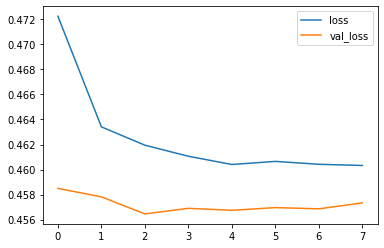

In [42]:
# PLain model
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Model Evaluation

In [43]:
predictions = model.predict_classes(X_test)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     80773
           1       0.50      0.00      0.01     19988

    accuracy                           0.80    100761
   macro avg       0.65      0.50      0.45    100761
weighted avg       0.74      0.80      0.71    100761



In [45]:
print(confusion_matrix(y_test, predictions))

[[80719    54]
 [19934    54]]
